In [1]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import math
import random
import sys
import time
from scipy.spatial import distance
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget','class']
del numericalDF['Unnamed: 0']
del numericalDF['class']
for i in columnas:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
X = numericalDF.head(20)
numericalDF.head()

,directores,criticas,duracion,genero,actores1,actores2,actores3,rostros,scores,gross,budget
0,0.024778,0.003295,0.011543,0.007769,0.034020,0.029215,0.027567,0.007924,0.014223,0.000016,7.773335e-08
1,0.031655,0.001073,0.012825,0.011654,0.015347,0.000761,0.027559,0.028946,0.013576,0.000002,2.522814e-03
2,0.031642,0.000996,0.009747,0.018128,0.034004,0.029206,0.027551,0.007924,0.013576,0.007426,9.893336e-08
3,0.001505,0.003295,0.005515,0.022013,0.033988,0.029196,0.027543,0.005789,0.016162,0.007426,2.522814e-03
4,0.031629,0.000077,0.011158,0.011654,0.024448,0.029186,0.006778,0.011579,0.016593,0.007426,2.522814e-03


Prototipos de clase (centroides):
 [[ 0.00718267  0.01091739  0.01393615  0.01156831  0.00569851  0.00777577
   0.00854203  0.01159265  0.01380376  0.00680788  0.00236055]
 [ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
   0.02015146  0.0108683   0.01365267  0.00408957  0.00097628]
 [ 0.00187227  0.02443207  0.01557765  0.0052683   0.00219419  0.00289628
   0.00310526  0.01113897  0.01506656  0.03488756  0.01086674]]


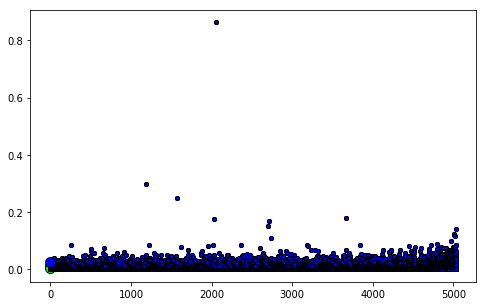

In [3]:
test_point = numericalDF.head(1).values
train_set = numericalDF.tail(len(numericalDF)-1).values
num_clusters = 3
k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
k_means.fit(train_set) 
print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

fig = plt.figure(figsize=(8, 5))
colors = ['#ff0000', '#00ff00', '#0000ff']
for k in range(num_clusters):
    my_members = k_means.labels_ == k
    plt.plot(train_set, 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=4)
    plt.plot(k_means.cluster_centers_[k][0], k_means.cluster_centers_[k][1], 'o', 
             markeredgecolor='k', markerfacecolor=colors[k], markersize=10)
plt.show()

In [6]:
LARGER_DISTANCE = sys.maxsize

k_neighs = 9 # 5 vecinos... aunque tomaremos sólo el más cercano
neighbors_dists = [LARGER_DISTANCE] * k_neighs
neighbors = [0] * k_neighs

for i in range(len(train_set)):
    dist = distance.euclidean(train_set[i], test_point)

    for k in range(k_neighs):
        if (dist < neighbors_dists[k]) :
            for j in range(k_neighs-1, k, -1):
                neighbors_dists[j] = neighbors_dists[j-1]
                neighbors[j] = neighbors[j-1] 
            neighbors_dists[k] = dist
            neighbors[k] = i
            break

print("Los {} vecinos más próximos son:".format(k_neighs))
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    print("Vecino {}: {}, dist={}, clase={}, centroide={}"
          .format(k, neighbors[k], neighbors_dists[k], 
                  clase, k_means.cluster_centers_[clase]))
print("\nEl nuevo punto es asignado a la clase", k_means.labels_[neighbors[0]])


Los 9 vecinos más próximos son:
Vecino 0: 57, dist=0.004947492644998996, clase=1, centroide=[ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
  0.02015146  0.0108683   0.01365267  0.00408957  0.00097628]
Vecino 1: 4, dist=0.0053665991564048506, clase=1, centroide=[ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
  0.02015146  0.0108683   0.01365267  0.00408957  0.00097628]
Vecino 2: 247, dist=0.006029755724807951, clase=1, centroide=[ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
  0.02015146  0.0108683   0.01365267  0.00408957  0.00097628]
Vecino 3: 295, dist=0.006210095709350147, clase=1, centroide=[ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
  0.02015146  0.0108683   0.01365267  0.00408957  0.00097628]
Vecino 4: 230, dist=0.006356622410565081, clase=1, centroide=[ 0.02061054  0.00596791  0.01278341  0.01349882  0.02131367  0.02067839
  0.02015146  0.0108683   0.01365267  0.00408957  0.

In [7]:
simple_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    clase = k_means.labels_[neighbors[k]]
    simple_vote[clase] += 1
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("Votación simple:\nEl nuevo punto es asignado a la clase {} con {} vecinos cercanos.\n"
      .format(winner, simple_vote[winner]))

print("Los {} vecinos más próximos y sus pesos ponderados son:".format(k_neighs))
suma_dists = sum(neighbors_dists)
neighbors_weights = [0] * k_neighs
weighted_vote = [0] * num_clusters
winner = 0 
for k in range(k_neighs):
    neighbors_weights[k] = 1 - neighbors_dists[k] / suma_dists
    clase = k_means.labels_[neighbors[k]]
    weighted_vote[clase] += neighbors_weights[k]
    print("Vecino {}: peso={}, clase: {}"
          .format(k, neighbors_weights[k], k_means.labels_[neighbors[k]]))
for k in range(num_clusters):
    if (simple_vote[k] == max(simple_vote)):
        winner = k
print("\nVotación ponderada:")
print("El nuevo punto es asignado a la clase {} con una votación de {}."
      .format(winner, weighted_vote[winner]))


Votación simple:
El nuevo punto es asignado a la clase 1 con 9 vecinos cercanos.

Los 9 vecinos más próximos y sus pesos ponderados son:
Vecino 0: peso=0.9099945223794899, clase: 1
Vecino 1: peso=0.9023700781529624, clase: 1
Vecino 2: peso=0.8903058411830231, clase: 1
Vecino 3: peso=0.8870250709813325, clase: 1
Vecino 4: peso=0.8843594367554103, clase: 1
Vecino 5: peso=0.8828772972246776, clase: 1
Vecino 6: peso=0.8817554513209798, clase: 1
Vecino 7: peso=0.881439103227343, clase: 1
Vecino 8: peso=0.8798731987747817, clase: 1

Votación ponderada:
El nuevo punto es asignado a la clase 1 con una votación de 8.0.
